In [ ]:
print("Hello Pandas - Merging Joining and Concatenating")

Hello Pandas - Merging Joining and Concatenating


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df1=pd.DataFrame({'A':['A0','A1','A2','A3'],
                  'B':['B0','B1','B2','B3'],
                  'C':['C0','C1','C2','C3'], 
                  'D':['D0','D1','D2','D3']}, 
                 index=[0,1,2,3])

In [ ]:
df2=pd.DataFrame({'A':['A4','A5','A6','A7'],
                  'B':['B4','B5','B6','B7'],
                  'C':['C4','C5','C6','C7'], 
                  'D':['D4','D5','D6','D7']}, 
                 index=[0,1,2,3])

In [ ]:
df3=pd.DataFrame({'A':['A8','A9','A10','A11'],
                  'B':['B8','B9','B10','B11'],
                  'C':['C8','C9','C10','C11'], 
                  'D':['D8','D9','D10','D11']}, 
                 index=[0,1,2,3])


## Concatenation 
Combine two DataFrame objects with identical columns.

In [ ]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7
0,A8,B8,C8,D8
1,A9,B9,C9,D9


In [ ]:
pd.concat([df1,df2,df3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4,A8,B8,C8,D8
1,A1,B1,C1,D1,A5,B5,C5,D5,A9,B9,C9,D9
2,A2,B2,C2,D2,A6,B6,C6,D6,A10,B10,C10,D10
3,A3,B3,C3,D3,A7,B7,C7,D7,A11,B11,C11,D11


## Merging: Single key

In [ ]:
left=pd.DataFrame({'key':['K0','K1','K2','K3'],
                   'A':['A0','A1','A2','A3'],
                   'B':['B0','B1','B2','B3'],
                   })

In [ ]:
right=pd.DataFrame({'key':['K0','K1','K2','K3'],
                   'A':['A4','A5','A6','A7'],
                   'B':['B4','B5','B6','B7'],
                   })

In [ ]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [ ]:
right

,key,A,B
0,K0,A4,B4
1,K1,A5,B5
2,K2,A6,B6
3,K3,A7,B7


In [ ]:
pd.merge(left,right,how='inner',on='key')

,key,A_x,B_x,A_y,B_y
0,K0,A0,B0,A4,B4
1,K1,A1,B1,A5,B5
2,K2,A2,B2,A6,B6
3,K3,A3,B3,A7,B7


## Merging: Multiply keys
 DataFrames are now merged into a single DataFrame based on the common values present in the id column of both the DataFrames

In [ ]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

In [ ]:
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [ ]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [ ]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


## Merging on Multiply keys
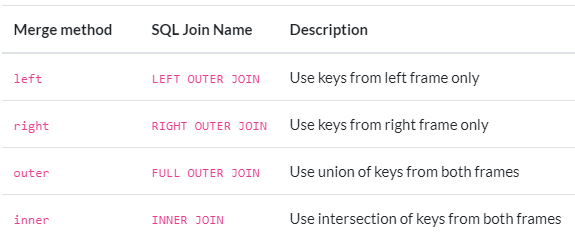


In [ ]:
pd.merge(left,right,on=['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [ ]:
pd.merge(left,right,how='outer',on=['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [ ]:
pd.merge(left,right,how='right',on=['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [ ]:
pd.merge(left,right,how='left',on=['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


## Joining  
Joining is a convenient method for combining the two columns of the two potentially differently-indexed DataFrame into a single result DataFrame; 
Same as Merging, except the *key* is index, instead of columns

In [ ]:

left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])


In [ ]:
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                     'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [ ]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [ ]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [ ]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [ ]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3
